In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

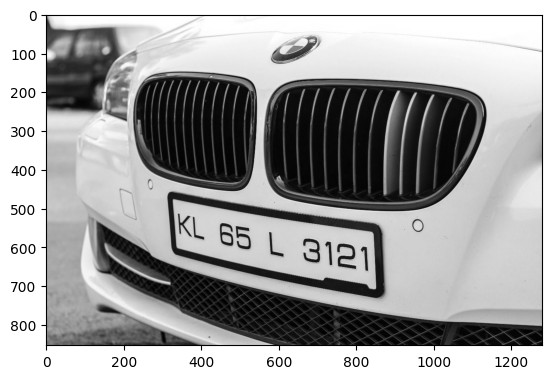

In [2]:
img = cv2.imread('img1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

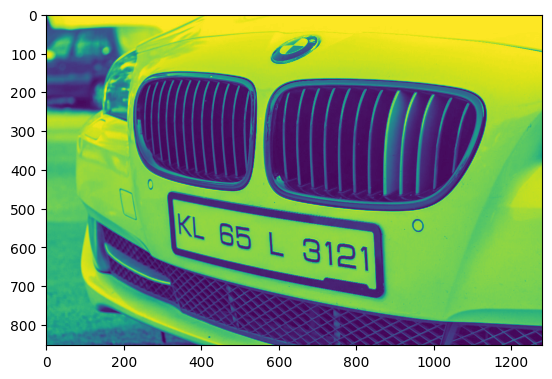

In [3]:
plt.imshow(gray)

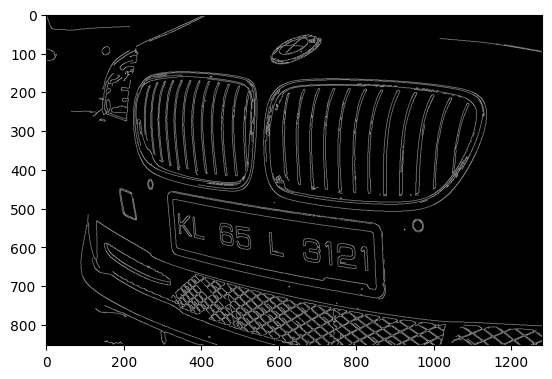

In [4]:
filtering = cv2.bilateralFilter(gray,11,17,17)
edged = cv2.Canny(filtering,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [5]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key = cv2.contourArea,reverse = True)[:10]

In [6]:
location_np = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location_np = approx
        break

In [7]:
location_np

array([[[327, 477]],

       [[341, 604]],

       [[851, 708]],

       [[841, 561]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location_np],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask = mask)

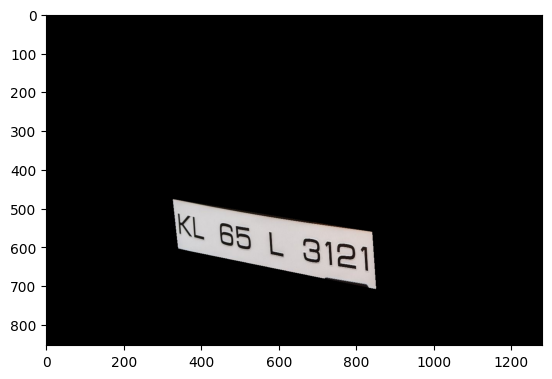

In [9]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask == 255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_img = gray[x1:x2+1,y1:y2+1]

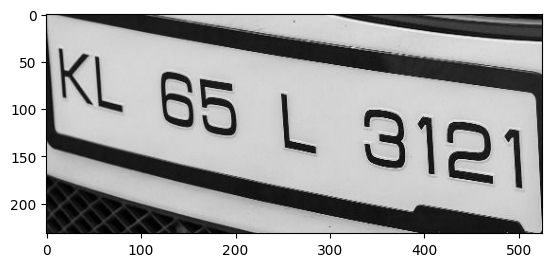

In [11]:
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))

In [12]:
reader = easyocr.Reader(['en'])
res = reader.readtext(cropped_img)
res

[([[2, 30], [92, 30], [92, 110], [2, 110]], 'KL', 0.9997303551123584),
 ([[242, 84], [298, 84], [298, 152], [242, 152]], 'L', 0.999109824007892),
 ([[120.97228394637953, 45.05887033350199],
   [241.38419857536553, 70.72811762912565],
   [222.02771605362045, 149.941129666498],
   [101.61580142463445, 125.27188237087435]],
  '65',
  0.6263862422605331),
 ([[334.88334943185265, 83.05682443215608],
   [529.5891603416928, 113.02179865389887],
   [511.11665056814735, 202.94317556784392],
   [316.4108396583071, 172.97820134610112]],
  '3121',
  0.6335545632484558)]

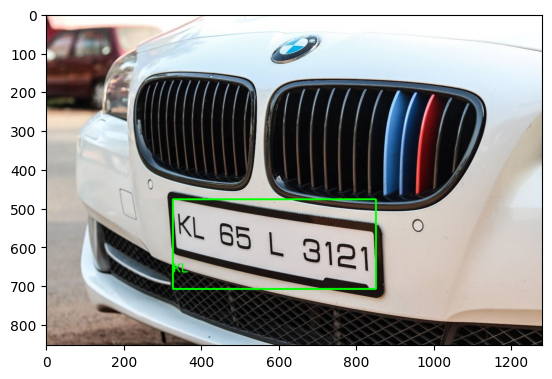

In [13]:
text = res[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

## my thoughts on how to improve the performance of detecting the numper plate

1. this code is detecting the number plate but not always especially on bikes 
   and pictures from different angles
2. we can improve the performance by resizing the image 
   and selecting the region of interest by ROI in opencv